In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
bs = 64

In [5]:
path = Path('../dataset/')
data = ImageDataBunch.from_folder(path=path, valid_pct=0.2,ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

['deer', 'gazelle', 'unicorn']


(3, 3)

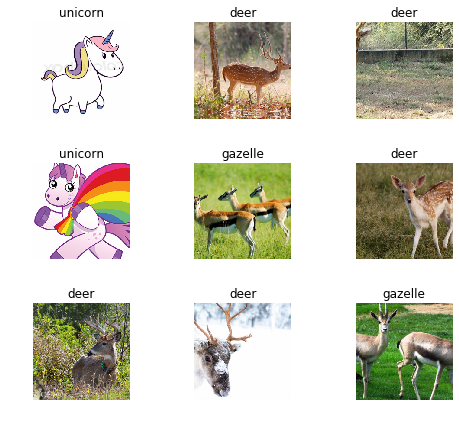

In [6]:
data.show_batch(rows=3, figsize=(7,6))
print(data.classes)
len(data.classes),data.c

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.081931,0.462895,0.187500,00:09
1,0.665034,0.282270,0.072917,00:06
2,0.474645,0.301636,0.093750,00:06
3,0.368873,0.290039,0.062500,00:06


In [9]:
learn.save('stage-1')

# Examine losses

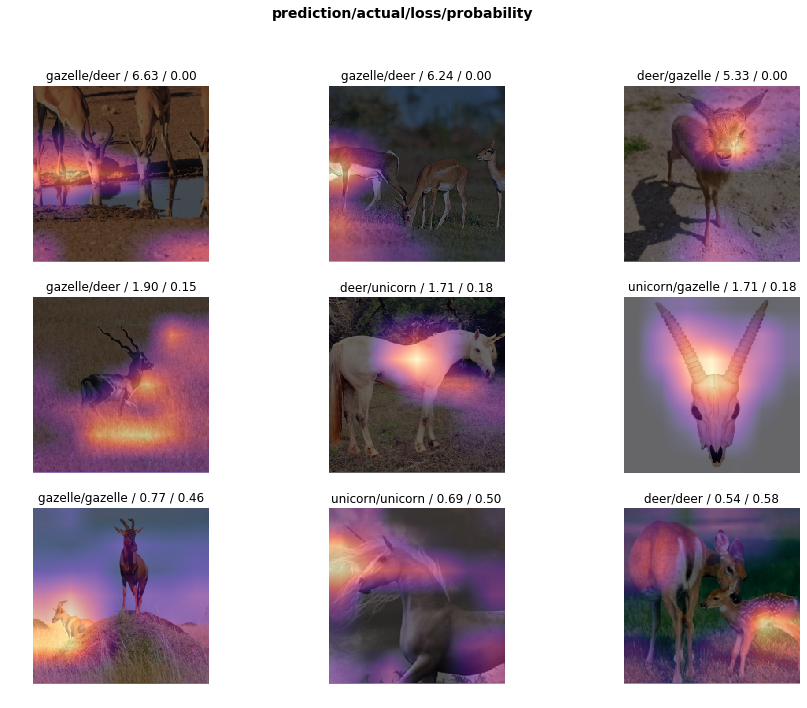

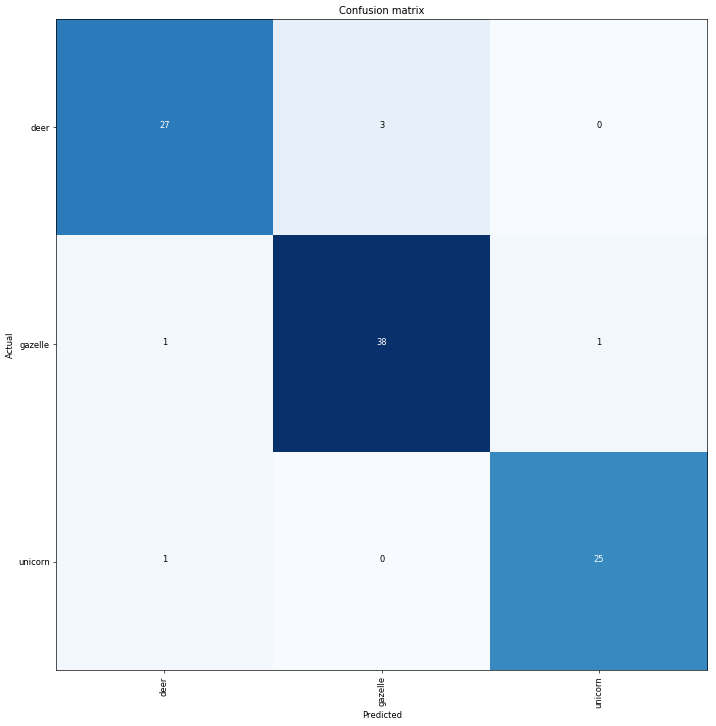

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# improve model

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


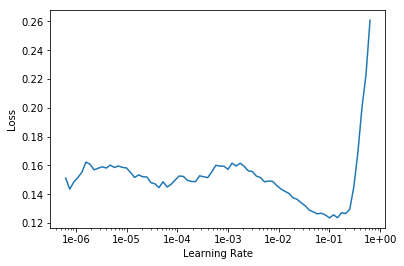

In [15]:
learn.recorder.plot()

In [16]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,2.489521,54.114487,0.529412,00:05
1,2.182744,1837.346924,0.500000,00:04


# no good restore stage1

In [ ]:
learn.load('stage-1');

In [11]:
learn.export('../model/model_with_unicorn.pkl')

# prediction example

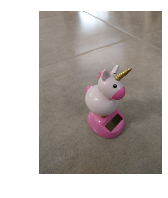

In [12]:
path = Path()
img = open_image('/home/jupyter/beast_model/example.jpg')
img2 = open_image('/home/yonigo10/WhatsApp Image 2019-04-20 at 12.09.17.jpeg')
img2.show()

In [13]:
learn2 = load_learner('../model/', 'model_with_unicorn.pkl')

In [14]:
pred_class,pred_idx,outputs = learn2.predict(img)
pred_class,outputs

(Category gazelle, tensor([3.2743e-01, 6.7229e-01, 2.7723e-04]))

[PosixPath('../model'), PosixPath('../nbs'), PosixPath('../dataset')]